<a href="https://colab.research.google.com/github/geovaniGomes/Data_Science/blob/master/Analisando_os_Dados_do_Airbnb_Montreal_Canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<center><h1>Análise dos Dados do Airbnb Montreal<h1></center>


![imagem](https://st.depositphotos.com/1030808/2109/i/950/depositphotos_21092105-stock-photo-montreal-over-river-at-dusk.jpg)

# Contextualização
---

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Montreal, e ver quais insights podem ser extraídos a partir de dados brutos.**


# Por Onde Começar ?
---

Em todo **projeto** possui um fluxograma onde cada etapada é realizada para cumprir um objetivo.
<p>Expecificamente falando em projeto de Ciência de dados, caso você ja inicie o projeto importando a base de dados, modelando e ir explorando sua base, possivelmente você ficará perdido no meio do processo.

Para este projeto de análise exploratória, seguiremos as seguintes etapas:

- **Objetivo do Projeto**   
- **Obtenção dos Dados**
- **Preparação do dados**
- **Exploração dos Dados**
- **Conclusão**

## Objetivo do Projeto
---

O projeto consiste em uma análise exploratória dos dados Airbnb da cidade Montreal Canadá.

Tem como objetivo de responder as seguintes questões:

- **Q1- Média dos preços de aluguéis**
- **Q2- Qual tipo de imóvel mais alugado no Airbnb**
- **Q3- Qual localidade co  valor mais alto**
- **Q4- Qual é média do mínimo de noites para o aluguel**
- **Q5- Quais localidades possuem os melhores aluguéis**






## Obtenção dos Dados
---

Os dados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html)*.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

listings.csv - Summary information and metrics for listings in Montreal, Quebec, Canada (good for visualisations).


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/qc/montreal/2020-04-20/visualisations/listings.csv')

### Definição de Dados 

---
A definição dos dados te ajuda a entender melhor a base que você irá trabalhar. Ou seja, você tem a indentificação de dados para entender a regra de negócio e assim fazer suas análizes. Sejam elas para exploração de dados de daos, limpeza de dados ou até mesmo um Modelo de Machine Learning.

**Dicionário de dados**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, visualizando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2844,7910428,Relaxing 1 bedroom apartment,18062076,Allison,NaN,Villeray-Saint-Michel-Parc-Extension,45.53941,-73.61946,Entire home/apt,10,1,31,2017-07-24,0.55,1,0
3670,10712396,A room that will make your stay fun,55361862,Kris,NaN,Saint-Laurent,45.49903,-73.69614,Private room,10,1,0,NaN,NaN,1,0
1153,3735511,"Grde chambre avec immense terrasse, sur le Pla...",19094597,Roxane,NaN,Le Plateau-Mont-Royal,45.53202,-73.57583,Private room,13,1,2,2017-08-22,0.06,1,0
4110,12346527,Bel appartement abordable |Rosemont,66670417,Simon,NaN,Rosemont-La Petite-Patrie,45.54137,-73.60544,Private room,13,1,1,2016-05-29,0.02,1,0
4723,13476569,chambre pour personne en solo,77127178,Anass,NaN,Mercier-Hochelaga-Maisonneuve,45.58767,-73.54151,Private room,13,1,0,NaN,NaN,1,0


## Limpeza dos Dados
---
Nessa fase é onde iremos analisar o nosso conjunto de dados para encontrar valores inválidos (valores que não condiz com a realidade.), valores faltantes, dados duplicados, formatação de dados (parse de data, conversões de valores) e entre outras manipulações de dados.


**primeiramente iremos verificar as dimensões do nosso DataSet:**



In [ ]:

print(" Quantidade de entradas: {}\n Quantidade de variáveis: {}".
      format(df.shape[0],df.shape[1]))

 Quantidade de entradas: 19731
 Quantidade de variáveis: 16


**Iremos verificar agora os valores faltantes:**


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
porcentagens_valores_ausentes = ((df.isnull().sum() / df.shape[0] * 100)).sort_values(ascending=False)
print('% dos valores ausentes:', '\n')
display(porcentagens_valores_ausentes)

% dos valores ausentes: 



neighbourhood_group               100.000000
reviews_per_month                  20.287872
last_review                        20.287872
name                                0.091227
host_name                           0.005068
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

Notamos que na coluna 'neighbourhood_group' temos 100% dos dados ausentes. Portanto essa coluna é inválida iremos dropar a mesma.
 Nas colunas 'reviews_per_month' e 'last_review' temos em torno de 20% dos valores faltantes.
A coluna iremos name cerca de 9% e host_name 5%.Iremos preencher os dados de acordo com os valores da coluna.  Iremos trata-los mais a frente.

Sobre os valores invalidos. Iremos plotar um grafico do tipo boxplot ( gráfico de caixa). Ele é indicado para visualizar outliers tanto acima da média quanto abaixo da média. 

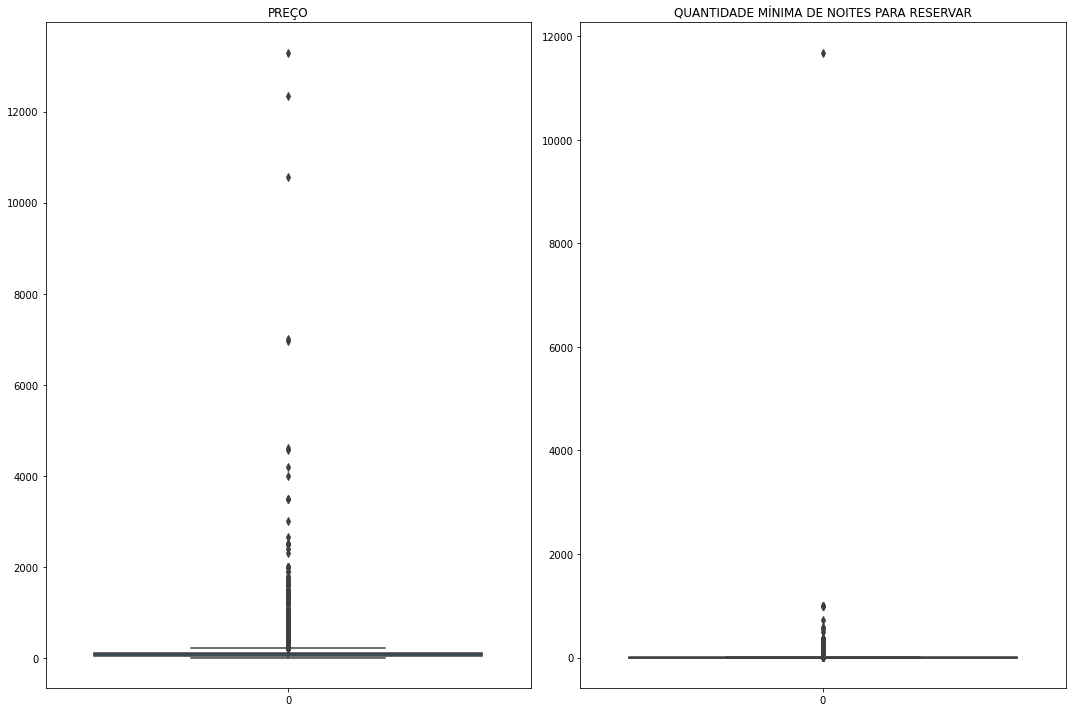

In [ ]:
f,axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True)

sns.boxplot(data=[df['price']], ax=axes[0]).set_title('PREÇO')
sns.boxplot(data=[df['minimum_nights']], ax=axes[1]).set_title('QUANTIDADE MÍNIMA DE NOITES PARA RESERVAR')
plt.title('')
plt.tight_layout()

In [ ]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.973100e+04,1.973100e+04,0.0,19731.000000,19731.000000,19731.000000,19731.000000,19731.000000,15728.000000,19731.000000,19731.000000
mean,2.399185e+07,8.852442e+07,NaN,45.515788,-73.589135,115.074603,10.714764,23.139577,1.230853,6.238863,104.254726
std,1.246135e+07,9.298110e+07,NaN,0.031312,0.042467,232.801705,89.794089,46.376375,1.622968,15.858081,129.375992
min,2.078000e+03,1.671000e+03,NaN,45.404540,-73.964380,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.378690e+07,1.393348e+07,NaN,45.497290,-73.602985,49.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,2.434997e+07,4.902391e+07,NaN,45.518870,-73.579460,78.000000,2.000000,5.000000,0.550000,1.000000,37.000000
75%,3.529140e+07,1.428914e+08,NaN,45.533645,-73.566040,120.000000,5.000000,23.000000,1.660000,3.000000,180.000000
max,4.323005e+07,3.442274e+08,NaN,45.700200,-73.480770,13294.000000,11684.000000,676.000000,13.390000,143.000000,365.000000


In [ ]:
df_describe = df[['price','minimum_nights','number_of_reviews']]
df_describe.describe()

,price,minimum_nights,number_of_reviews
count,19731.000000,19731.000000,19731.000000
mean,115.074603,10.714764,23.139577
std,232.801705,89.794089,46.376375
min,10.000000,1.000000,0.000000
25%,49.000000,1.000000,1.000000
50%,78.000000,2.000000,5.000000
75%,120.000000,5.000000,23.000000
max,13294.000000,11684.000000,676.000000


### Resumo das plotagens do BoxPlot e do método Describe.

Na plotagem da coluna  **Price**,  o nosso menor preço é em torno de $10.000. E uma máxima de `$`13294.00
e metade dos preços abaixo dos `$`78.

Na coluna **minimum_nights** temos uma quantidade mínima de noites de 11684 (valor inválido). Com uma média abaixo dos 10 dias. 







### Função para remover outliers

Começaremos agora a tratar os outliers. Para esse tratamento, ultilizaremos o métodos dos Quartis.

É uma regra bastante usada que um dado é um outlier quando ele é maior que 1,5⋅FIQ1, acima do terceiro quartil ou abaixo do primeiro quartil. Em outras palavras, outliers baixos estão abaixo de Q1 -1,5 FIQ e outliers altos estão acima de Q3 + 1.5. FIQ.


In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-(1.5*iqr)
    fence_high = q3+(1.5*iqr)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# Ordenação dos valores de price e minimum_nights
df = df.sort_values(['price', 'minimum_nights'])
df_clean = df.copy()
# Plicando o métodos de romover outliers
df_clean = remove_outlier(df,'price')
df_clean = remove_outlier(df_clean,'minimum_nights')

De início, ordenamos nossas colunas Price e minimum_nights em ordem crescente.
Após a ordenação, aplicamos nossa função que como retorno temos valores que estão acima do Q1 e abaixo do Q3.

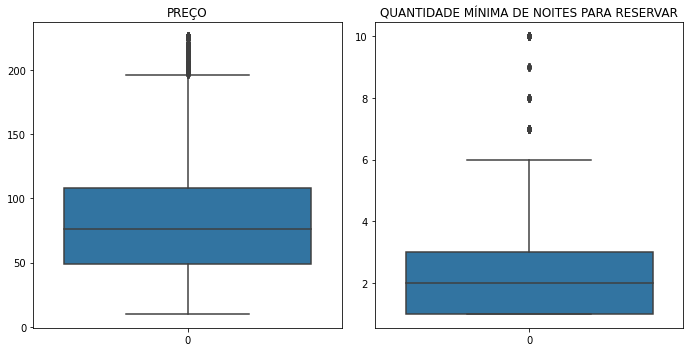

In [ ]:
f,axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.boxplot(data=[df_clean['price']], ax=axes[0]).set_title('PREÇO')
sns.boxplot(data=[df_clean['minimum_nights']], ax=axes[1]).set_title('QUANTIDADE MÍNIMA DE NOITES PARA RESERVAR')
plt.tight_layout()

### Método para preencher os Missing Values

Na indentificação dos valores faltantes divemos a seguinte respota:

Colunas | Valores Faltantes %
:------:|:------------------:
neighbourhood_group |100.000000
reviews_per_month|20.287872
last_review |20.287872
name|0.091227
host_name |0.005068


a coluna neighbourhood_group iremos deletar devido ao percentual de 100% faltante.

na coluna reviews_per_month que é a quantidade de reviews por mês, preencheremos com a média.
A coluna last_review e host_name com a moda(valor com mais frequência).

In [ ]:
# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

In [ ]:
'''pegando os valores com mais frequência das colunas last_review
name e host_name
'''
moda_last_review=mode(df_clean['last_review'])
moda_name=mode(df_clean['name'])
moda_host_name = mode(df['host_name'])

Esse pacote do scipy.statics mode é responspável para verificar a moda no nosso dataSet. As colunas **last_review**, **name** e **host_name** são colunas do tipo texto. Então preencheremos os campos faltantes com a moda de cada coluna. Ou seja o valor com mais frequência. Enquanto a coluna **reviews_per_month** será preenchida com a média.

In [ ]:
df_clean['last_review'].fillna(moda_last_review.mode[0],inplace=True)
df_clean['name'].fillna(moda_name.mode[0],inplace=True)
df_clean['host_name'].fillna(moda_host_name.mode[0],inplace=True)
df_clean['reviews_per_month'].fillna(df_clean['reviews_per_month'].mean(), inplace=True)

In [ ]:
porcentagens_valores_ausentes = ((df_clean.isnull().sum() / df_clean.shape[0] * 100)).sort_values(ascending=False)

print('% dos valores ausentes:', '\n')
display(porcentagens_valores_ausentes)

% dos valores ausentes: 



availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
host_name                         0.0
host_id                           0.0
name                              0.0
id                                0.0
dtype: float64

## Análise dos Dados


Aṕos a noramlização de nossa base, iniciaremos nossa análise exploraória.

com o intuito de responder as questão que foram citadas na sessão de objetivos do projeto. São elas:

- **Q1- Média dos preços de aluguéis**
- **Q2- Qual tipo de imóvel mais alugado no Airbnb**
- **Q3- Qual localidade com o valor mais alto**
- **Q4- Qual é média do mínimo de noites para o aluguel**
- **Q5- Quais localidades possuem os melhores aluguéis**

### **Q1. Média dos preços de aluguéis**

In [ ]:
# ver a média da coluna `price``
media_precos = df_clean['price'].mean()
print('Média dos preços dos imóveis em Montreal', '$' +"%.2f" % media_precos)

Média dos preços dos imóveis em Montreal $83.44


### **Q2. Qual tipo de imóvel mais alugado no Airbnb** 

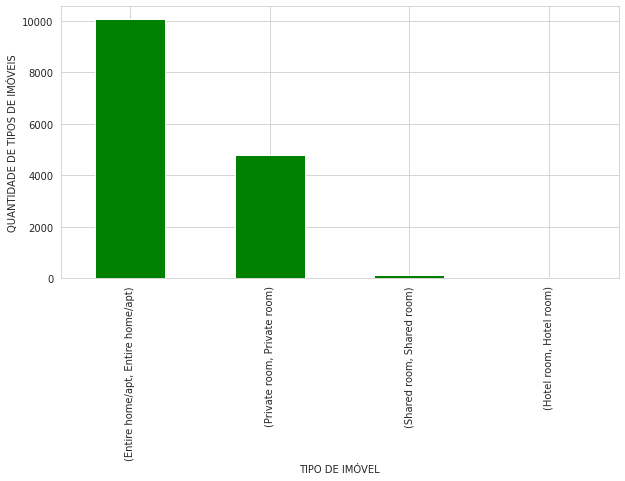

In [ ]:
tipos_imoveis = df_clean.groupby('room_type')['room_type'].value_counts().sort_values(ascending=False)
tipos_imoveis.plot(kind='bar', figsize=(10,5), color='green')
plt.xlabel("TIPO DE IMÓVEL")
plt.ylabel("QUANTIDADE DE TIPOS DE IMÓVEIS")
plt.grid(True)
plt.show()


No gráfico acima é mostrado quais tipos de imóveis é mais alugado. Devido a forma que os dados se econtram, não é possível saber qual deles é mais alugado. Para descobrir, temos que explorar melhor essa variável fazendo uma separação desses dados. 

In [ ]:
df_clean["room_type"].str.get_dummies('/')

,Entire home,Hotel room,Private room,Shared room,apt
2844,1,0,0,0,1
3670,0,0,1,0,0
1153,0,0,1,0,0
4110,0,0,1,0,0
4723,0,0,1,0,0
...,...,...,...,...,...
6534,1,0,0,0,1
916,1,0,0,0,1
4644,1,0,0,0,1
11027,1,0,0,0,1


A função str.get_dummies () é usada para dividir cada sequência na série  e retornar um DataFrame de variáveis ​​dummy / indicador.

In [ ]:
df_clean["room_type"].str.get_dummies('/').sum()/df_clean.shape[0] *100

Entire home     66.921797
Hotel room       0.339434
Private room    31.773710
Shared room      0.965058
apt             66.921797
dtype: float64

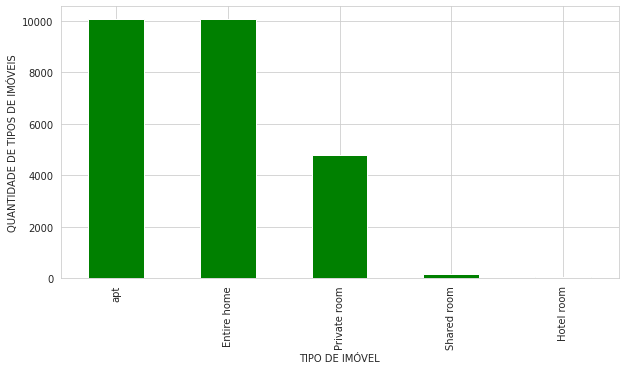

In [ ]:
tipos_imoveis = df_clean["room_type"].str.get_dummies('/').sum().sort_values(ascending=False)
tipos_imoveis.plot(kind='bar', figsize=(10,5), color='green')
plt.xlabel("TIPO DE IMÓVEL")
plt.ylabel("QUANTIDADE DE TIPOS DE IMÓVEIS")
plt.grid(True)
plt.show()

Agora sim podemos saber qual é o tipo de imóvel mais alugado. Mas notem que temos apt(Apartamento), Entire home(Casa enteira). E ambos possuem o mesmo quantidade de aluguel.

Para sabermos mais sobre essa ocorrência, deveriamos pegar um dataSet mais completo (com mais variáveis).

Para essa análise podemos concluir não só o qual é o tipo de imóvel mais alugado, mas sim quais tipo de imoveis são mais alugados. São eles :

APT|Entire Home|Private room
---:|:-----------:|:--------:|
66.92%| 66.92|31.77%


### **Q3. Qual localidade com  valor mais alto**

In [ ]:
media_precos_por_bairro = (df_clean.groupby('neighbourhood')['price'].sum() /df_clean.shape[0]).sort_values(ascending=False)
media_precos_por_bairro

neighbourhood
Le Plateau-Mont-Royal                       24.109484
Ville-Marie                                 22.306223
Rosemont-La Petite-Patrie                    8.377637
Côte-des-Neiges-Notre-Dame-de-Grâce          5.283062
Le Sud-Ouest                                 4.999800
Villeray-Saint-Michel-Parc-Extension         4.427022
Mercier-Hochelaga-Maisonneuve                3.943361
Verdun                                       2.040599
Ahuntsic-Cartierville                        1.285324
Outremont                                    1.144892
LaSalle                                      0.853311
Saint-Laurent                                0.826955
Westmount                                    0.468552
Lachine                                      0.438469
Saint-Léonard                                0.333245
Rivière-des-Prairies-Pointe-aux-Trembles     0.329983
Pointe-Claire                                0.326057
Pierrefonds-Roxboro                          0.292379
Montréal-Nord 

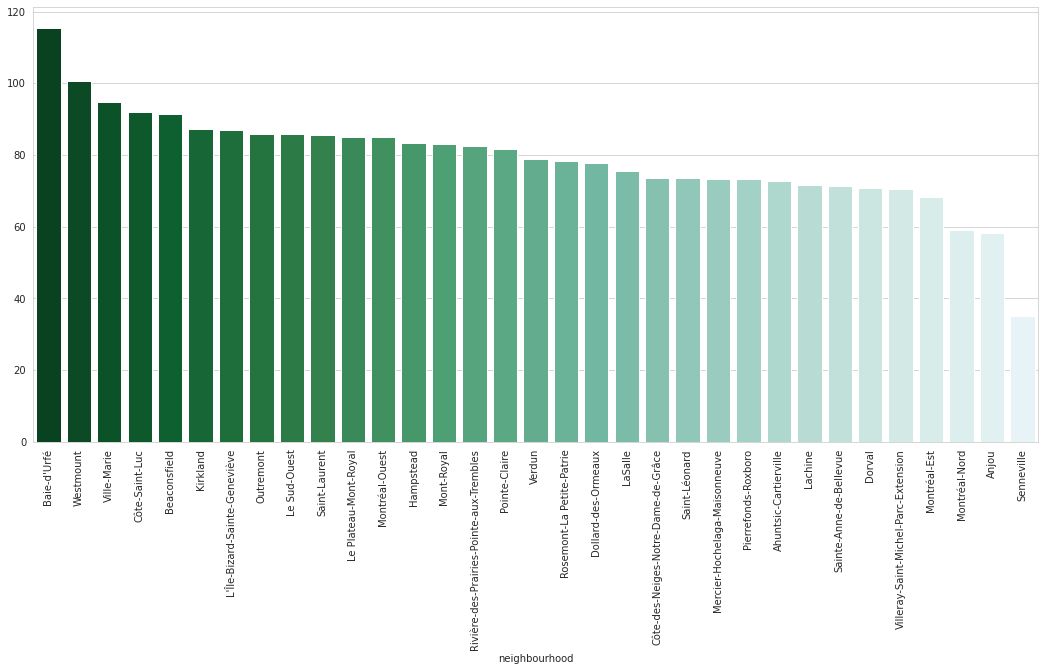

In [ ]:
sns.set_style("whitegrid")

media_precos_por_bairro =df_clean.groupby('neighbourhood').price.mean().sort_values(ascending=False)

plt.figure(figsize=(18,8))
sns.barplot(x=media_precos_por_bairro.index,
            y=media_precos_por_bairro.values,
          
            palette=sns.color_palette("BuGn_r", n_colors=len(media_precos_por_bairro) + 4))
plt.xticks(rotation=90)
plt.savefig('teste.jpg', edgecolor='black', dpi=1000, transparent=True)
plt.show()


### **Q4. Qual é média do mínimo de noites para o aluguel**

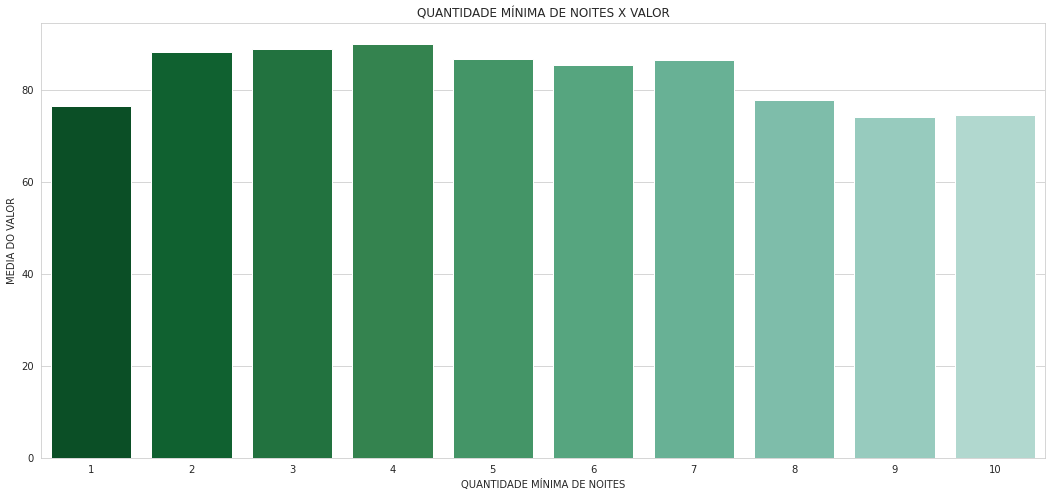

In [ ]:
sns.set_style("whitegrid")

media_minima_noites =df_clean.groupby('minimum_nights')['price'].mean()
plt.figure(figsize=(18,8))
sns.barplot(x=media_minima_noites.index,
            y=media_minima_noites.values,
          
            palette=sns.color_palette("BuGn_r", n_colors=len(media_minima_noites) + 4))

plt.title("QUANTIDADE MÍNIMA DE NOITES X VALOR")
plt.xlabel("QUANTIDADE MÍNIMA DE NOITES")
plt.ylabel("MEDIA DO VALOR")
plt.show()



In [ ]:
media_minima_noites

minimum_nights
1     76.593971
2     88.328562
3     88.867325
4     90.113145
5     86.682584
6     85.490991
7     86.612903
8     77.954545
9     74.076923
10    74.664671
Name: price, dtype: float64

## Q5- Quais localidades possuem os melhores aluguéis

In [ ]:
melhores_alugues = df_clean.groupby('neighbourhood')['number_of_reviews'].mean().sort_values(ascending=False)

In [ ]:
melhores_alugues

neighbourhood
Baie-d'Urfé                                 99.000000
Dorval                                      64.140000
Ville-Marie                                 38.562306
Lachine                                     32.576087
Hampstead                                   27.333333
Pointe-Claire                               26.466667
Rivière-des-Prairies-Pointe-aux-Trembles    25.533333
Mercier-Hochelaga-Maisonneuve               22.867738
Le Sud-Ouest                                22.360731
Le Plateau-Mont-Royal                       21.869923
Dollard-des-Ormeaux                         21.607143
Westmount                                   21.342857
Saint-Léonard                               19.426471
LaSalle                                     19.076471
Pierrefonds-Roxboro                         19.033333
Côte-des-Neiges-Notre-Dame-de-Grâce         18.545032
Ahuntsic-Cartierville                       18.094340
Anjou                                       17.804348
Rosemont-La Pe

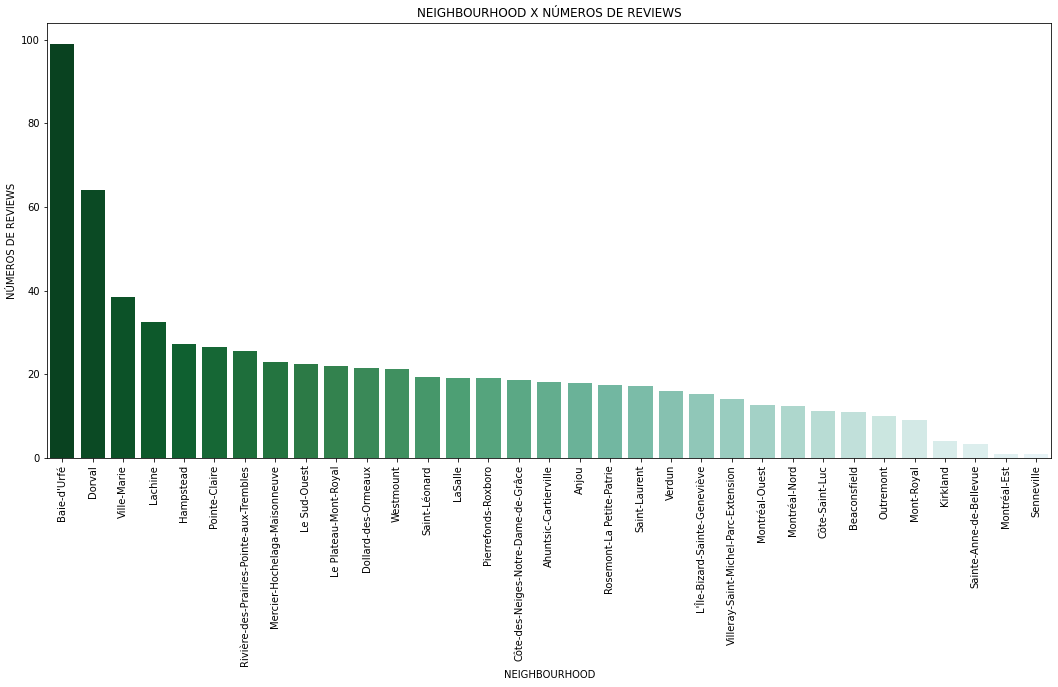

In [ ]:
plt.figure(figsize=(18,8))
sns.barplot(x=melhores_alugues.index,
            y=melhores_alugues.values,
          
            palette=sns.color_palette("BuGn_r", n_colors=len(melhores_alugues) + 4))

plt.title("NEIGHBOURHOOD X NÚMEROS DE REVIEWS")
plt.xlabel("NEIGHBOURHOOD")
plt.ylabel("NÚMEROS DE REVIEWS")
plt.xticks(rotation=90)
plt.show()

In [ ]:
media_minima_noites

minimum_nights
1     76.593971
2     88.328562
3     88.867325
4     90.113145
5     86.682584
6     85.490991
7     86.612903
8     77.954545
9     74.076923
10    74.664671
Name: price, dtype: float64

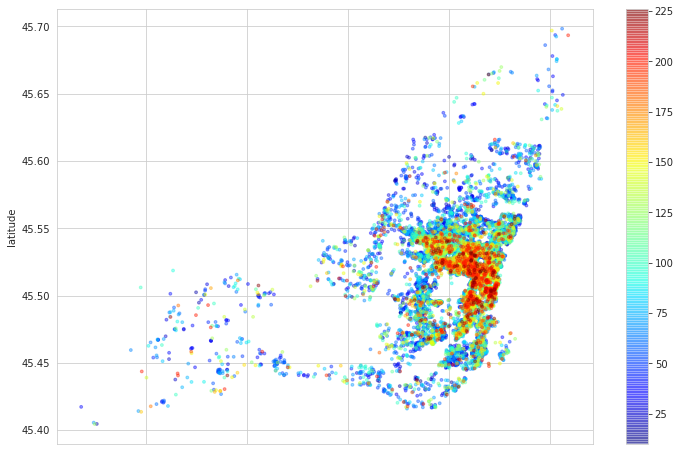

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


## Conclusões
---
Foi feita apenas uma análise superficial no conjunto de dados do Airbnb. Nela já foi possível obter alguns insights, como a média dos preços de alugéis que são $83.44. 

Durante a exploração notamos que os tipos de imóveis mais alugados são APT e Entire home que são Apartamentos de casas inteira respectivamente.

Extraímos também a informação das localidades com os valores mais altos. Que são eles:

- **Le Plateau-Mont-Royal**:

    O distrito nordeste de Plateau-Mont-Royal é o mais  habitado de Montreal. Normalmente, ele é reconhecido como o mais animado e "descolado". O bairro é dominado por artistas e estudantes, que frequentam as mais agitadas lanchonetes, boutiques, bares e galerias da cidade.

- **Ville-Marie**

    Museus fascinantes, cena artística famosa e grandes atrações como Vieux-Port de Montréal e Old Port: conheça Ville-Marie, um destino urbano famoso também por suas catedrais.

Concluímos também que a média mínima de aluguéis fica em torno de $76.59. 

Durante a nomalização dos dados percebemos que existem outliers em algumas das variáveis.

Os dados obtidos foram coletados de uma base mais simples do Airbnb. Onde temos poucas variáveis deixando assim o conjunto mais simples.

Por fim, lembre-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.



## Agradecimentos
---
Obrigado por me acompanhar até aqui. Em breve será disponibilizado mais conteúdos. Grade abraço e até mais !

#### **Contatos**
- [Linkedin](http://encurtador.com.br/bjEMX)
- [GitHub](http://encurtador.com.br/ikoDK)

by Geovani Gomes
